![Titre](C04.jpg)

## <span style='color:#AC1620'> Explication du programme en langage Python</span>

### <span style='color:#163538'> Exercice 20 p 89  : How to program a temporal evolution </span>

<span style='color:Green' > Remarque </span>  : Cet exercice permet de travailler la capacité numérique "_À l’aide d’un langage de programmation et à partir de données expérimentales, tracer l’évolution temporelle d’une concentration, d’une vitesse volumique d’apparition ou de disparition et tester une relation donnée entre la vitesse volumique de disparition et la concentration d’un réactif."_

**Pour faire fonctionner le programme à l'aide de Jupyter Notebook, il faut exécuter les cellules contenant du code les unes après les autres** 

La première étape consiste à importer :

* la bibliothèque <span style='color:red' > matplotlib.pyplot </span> avec l'alias *plt*. Elle sert à réaliser le graphique ;
* la bibliothèque <span style='color:red' > numpy </span> avec l'alias *np* . Elle est utile pour de nombreux outils mathématiques.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

L'exercice demande à l'élève de compléter les listes de la durée _t_ et de la concentration *C* avec les données de l'exercice 13.

In [2]:
# Compléter les listes suivantes et les décommenter
t = [0,200,400,600,800,1000,2000]
C = [200,100,50,25,12.5,6.3,3.1]

On calcule alors la vitesse de disparition $v_d$ à l'instant $t$. Pour cela, on utilise la relation : 

$$v_d(i)=\frac{\displaystyle |C(i+1)-C(i)|}{\displaystyle t(i+1)-t(i) }$$

On rentre dans une boucle et on calcule les valeurs de $v_d$ pour toutes les valeurs de la liste _t_ moins une pour éviter d'avoir un message d'erreur.

In [3]:
###################################################
# calcul des vitesses de disparition
###################################################
vd = []
for i in range (len(t)-1) :
    vd=vd+[abs((C[i+1]-C[i])/(t[i+1]-t[i]))]

On utilise alors la bibliothèque <span style='color:red' > matplotlib.pyplot </span> pour tracer les graphiques.

Dans un premier temps, on cherche la valeurs maximales de la concentration _C_, du temps *t* et de la vitesse de disparition $v_d$. Ces valeurs sont utiles ultérieurement pour fixer des limites au graphique à l'aide des commandes ``plt.xlim(min,max)`` et ``plt.ylim(min,max)``.

In [4]:
###################################################
### Représentation graphique
###################################################
Cmax=max(C)
tmax=max(t)
vdmax=max(vd)

On crée une figure de 1600 pixels de large sur 800 pixels de hauteur à l'aide de la commande ``plt.figure(figsize=(16,8)``.
On crée trois sous-figures à l'aide de la commande ``plt.subplot()``.

Pour chaque sous-figure : 
* ``plt.grid`` permet d'ajouter une grille au graphique ;
* ``plt.title`` permet d'ajouter un titre ; 
* ``plt.ylabel`` permet d'ajouter un titre à l'axe des ordonnées ;
* ``plt.xlabel`` permet d'ajouter un titre à l'axe des abscisses ; 
* ``plt.scatter`` permet de placer les points de coordonnées ($x;y$) correspondants de chaque liste.
Notons que pour la représentation $v_d=f(C)$, on a copié la liste de concentration _C_ (``C2=list(C)``), puis on a supprimé la dernière valeur ``del C2[-1]``, afin d'avoir autant de valeur pour la vitesse que pour la concentration, et ainsi ne pas avoir de message d'erreur.

Dans la troisième sous-figure, on indique les valeurs de la vitesse de disparition pour différents instants à l'aide de la commande ``plt.text(x,y, "texte")``.

Enfin,  ``plt.show()`` permet d'afficher le graphique ainsi obtenu.

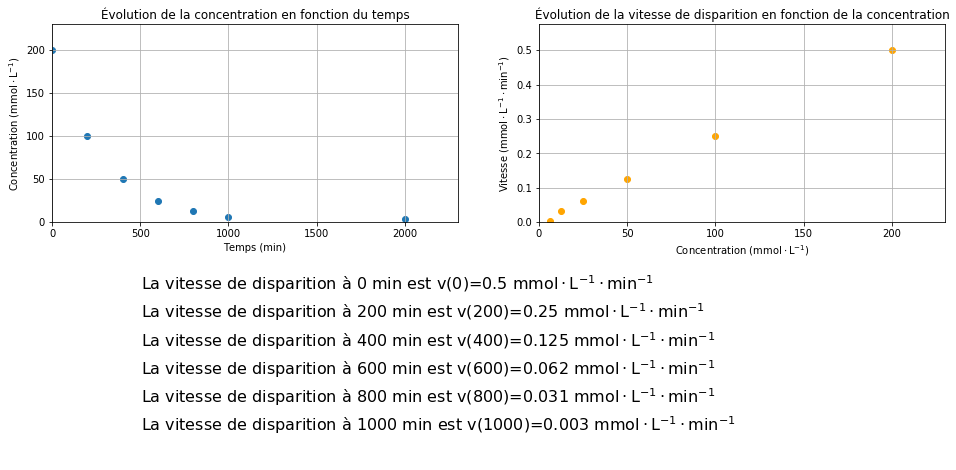

In [5]:
plt.figure(figsize=(16,8))

#sous-figure 1 - Graphique donnant l'évolution de la concentration en fonction du temps
plt.subplot(221) 
plt.grid()
plt.title("Évolution de la concentration en fonction du temps")
plt.xlim(0,1.15*tmax)
plt.ylim(0,1.15*Cmax)
plt.scatter(t,C)        
plt.xlabel("Temps (min)")
plt.ylabel("Concentration ($\mathrm{mmol \cdot L^{-1}}$)")

#sous-figure 2- Graphique donnant l'évolution de la vitesse de disparition en fonction du temps
plt.subplot(222)
C2=list(C)
C2max=max(C2)
del C2[-1]
plt.grid()
plt.title("Évolution de la vitesse de disparition en fonction de la concentration")
plt.xlim(0,1.15*C2max)
plt.ylim(0,1.15*vdmax)
plt.scatter(C2,vd,color='orange')
plt.ylabel("Vitesse ($\mathrm{mmol\cdot L^{-1} \cdot min^{-1}}$)")
plt.xlabel("Concentration ($\mathrm{mmol\cdot L^{-1}}$)")

#sous-figure 3- texte donnant les vitesses de disparition en fonction du temps.
plt.subplot(212, frameon=False)
plt.xticks([])
plt.yticks([])
for i in range (len(t)-1) :
    plt.text(0.1,((len(t)-1)-i)/len(t),"La vitesse de disparition à "+ str(t[i]) +\
             " min est v("+str(t[i])+")="+ str(round(vd[i],3)) +" $\mathrm{mmol\cdot L^{-1} \cdot min^{-1}}$",\
             fontsize = 16 )


plt.show()